# Berlin's Airbnb Market and Venues by Neighborhood

## **Table of Contents**
1. Introduction
2. Import Packages & Read in Data
3. Pre-processing
4. Exploratory Data Analysis
5. Feature Engineering & Exploration: Occupancy, Revenue per Month
6. Linear Regression Model
7. Choropleth Map of Revenue by Borough
8. Map, Segment, and Cluster Prenzlauer Berg / Pankow by Venues
9. Summary Results & Recommendations
10. Future Areas for Analysis

## 1. Introduction

As one of Europe's fastest-growing economies, Berlin has quickly grown into a tourism and residential real estate magnet. Imagine a hospitality chain or real estate developer aiming to enter the Berlin market to capitalize on growth. How could we help them develop an effective neighborhood-level entry strategy? 

A great place to turn to for data to help us s Airbnb, which is a strong proxy for residential real estate and hospitality business development in Berlin. In order to best structure our analysis, get an overview, clarify our assumptions, and understand what's needed, let's break down the problem into business questions, data questions, and data needs: 

**Business question 1**: Which of Berlin's boroughs / neighborhoods, should we enter first?
<br>**Data question 1** : Which boroughs and neighborhoods have the highest mean / median monthly occupancy and revenue?
<br>**Data need 1**: Airbnb listing price and occupancy data by neighborhood, Berlin geocoding and geojson data (for mapping)

**Business question 2**: What is the optimal price point? 
<br> **Data question 2**: What is the mean / median price by borough and neighborhood?
<br> **Data need 2**: Airbnb listing price per night by neighborhood, Berlin geocoding and geojson data (for mapping)

**Business question 3**: What status does a business / chain / developer garner? 
<br> **Data question 3**: What is the occupancy and revenue premium for an Airbnb superhost? 
<br> **Data need 3**: Airbnb listing superhost status along with above data

**Business question 4**: What unit capacity should we focus on?
<br> **Data question 4**: What are differences in mean / median monthly price, occupancy, revenue by capacity?
<br> **Data need 4**: Airbnb listing capacity data along with above data

**Business question 5**: What is the estimated revenue of a brand new listing? 
<br> **Data question 5**: What are factors can be used to predict monthly revenue? 
<br> **Data need 5**: Airbnb listing variables that can be used as predictors, monthly revenue as labeled target

**Business question 6**: What neighborhoods are most promising for fit and local business partnerships?
<br> **Data question 6**: What are Berlin's venues and venue categories by neighborhood and how do they cluster?
<br> **Data need 6**: Berlin neighborhoods data, venue info and geolocation data using Foursquare API, Berlin geocoding and geojson data 

In this analysis, we'll work with a data set of >22,500 Airbnb listings in Berlin, including 96 variables downloaded from Kaggle (https://www.kaggle.com/brittabettendorf/berlin-airbnb-data?select=listings_summary.csv). You can obtain original source Airbnb data for many cities around the world on Inside Airbnb (http://insideairbnb.com/get-the-data.html). Berlin geojson data was downloaded from https://raw.githubusercontent.com/pape1412/airbnb/master/data/berlin_neighbourhood_groups.geojson, originally sourced from https://data.technologiestiftung-berlin.de/dataset/bezirksgrenzenBerlin. Berlin's neighborhoods, specifically for Pankow, were scraped from Wikipedia (https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin) using BeautifulSoup. Venue data was obtained using the Foursquare API. 

Our analysis, results, discussion, and future areas of research is useful for any hospitality, real estate, or tourism-adjacent business interested in entering or expanding in Berlin, as well as for public planning / zoning. 

## 2. Import Packages and Read in Data

### Import Packages

In [121]:
# Import relevant libraries
import requests 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import random
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns

!pip install geopy
from geopy.geocoders import Nominatim # convert address into latitude and longitude

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe 
import urllib.request 
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!pip install folium
import folium
from folium import plugins 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.cm as cm
import matplotlib.colors as colors

# Scikit learn libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# Web scraping using BeautifulSoup
from urllib.request import urlopen
from bs4 import BeautifulSoup
!pip install lxml # Install lxml parser as it's faster than the built-in html parser

### Read In Data

In [122]:
# The code was removed by Watson Studio for sharing.

In [123]:
# Read in data
pd.options.display.max_columns = None
df_raw = pd.read_csv(body)

In [124]:
# Check first few rows
df_raw.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-1

## 3. Pre-processing

In [125]:
# Check dimensions of dataframe. We have 22,552 listings and 96  variables
df_raw.shape

(22552, 96)

In [126]:
# Create dataframe with only relevant variables
keep = ["host_is_superhost", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "latitude", "longitude", "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "price", "number_of_reviews", "review_scores_rating", "review_scores_location", "reviews_per_month"]
df = df_raw[keep]
df.head()

,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_location,reviews_per_month
0,t,Brunnenstr. Süd,Mitte,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,$60.00,118,93.0,10.0,3.76
1,f,Prenzlauer Berg Nordwest,Pankow,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,$17.00,6,100.0,10.0,1.42
2,f,Prenzlauer Berg Südwest,Pankow,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,1.0,$90.00,143,92.0,10.0,1.25
3,f,Schöneberg-Nord,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,2,1.0,1.0,$26.00,25,88.0,9.0,0.39
4,t,Helmholtzplatz,Pankow,52.543157,13.415091,Apartment,Private room,2,1.0,1.0,$42.00,197,96.0,10.0,1.75


In [127]:
# Let's rename select columns so they're easier to work with 
df.rename(columns={"host_is_superhost":"superhost", "neighbourhood_cleansed":"neighborhood","neighbourhood_group_cleansed":"borough"}, inplace=True)
df.columns

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Index(['superhost', 'neighborhood', 'borough', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'price', 'number_of_reviews', 'review_scores_rating',
       'review_scores_location', 'reviews_per_month'],
      dtype='object')

In [128]:
# Total count of each property type
df["property_type"].value_counts().to_frame()

,property_type
Apartment,20225
Condominium,612
Loft,460
House,398
Serviced apartment,175
Hostel,128
Townhouse,99
Guest suite,74
Bed and breakfast,64
Guesthouse,57


In [129]:
# Apartments represent the overwhelming majority of listings. Let's keep only apartments and remove other property types
all_property_types = df.shape[0]
df = df[df["property_type"] == "Apartment"]
print("{} non-apartment listings were removed from dataframe.".format(all_property_types - df.shape[0]))

2327 non-apartment listings were removed from dataframe.


In [130]:
# Change host_is_superhost values to binary integer values 0 for f and 1 for t
df['superhost'] = df['superhost'].map({'f':0,'t':1})

In [131]:
# Price variable has '$' and ',' signs, let's replace them and convert to numeric float data type. When using regex, | is seperator for the items we want to replace
df['price'] = df['price'].replace('\$|,', '', regex=True)
df['price'] = pd.to_numeric(df['price'])

### Missing values

In [132]:
# Check missing values
df.isnull().sum().to_frame()

,0
superhost,24
neighborhood,0
borough,0
latitude,0
longitude,0
property_type,0
room_type,0
accommodates,0
bathrooms,30
bedrooms,11


In [133]:
# Replace host_is_superhost missing values with 0
df['superhost'].replace(np.nan, 0, inplace=True)

In [134]:
# Replace bathrooms missing values with mean number of bathrooms
mean_bathrooms = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean_bathrooms, inplace=True)

In [135]:
# Replace bedrooms missing values with mean number of bedrooms
mean_bedrooms = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean_bedrooms, inplace=True)

In [136]:
# Replace review_scores_rating missing values with mean
mean_review_rating = df['review_scores_rating'].mean()
df['review_scores_rating'].replace(np.nan, mean_review_rating, inplace=True)

In [137]:
# Replace review_scores_location missing values with mean
mean_review_location = df['review_scores_location'].mean()
df['review_scores_location'].replace(np.nan, mean_review_location, inplace=True)

In [138]:
# Replace reviews_per_month missing values with mean
mean_reviews_per_month = df['reviews_per_month'].mean()
df['reviews_per_month'].replace(np.nan, mean_reviews_per_month, inplace=True)

In [139]:
# Check missing values, we have none now
df.isnull().sum().to_frame()

,0
superhost,0
neighborhood,0
borough,0
latitude,0
longitude,0
property_type,0
room_type,0
accommodates,0
bathrooms,0
bedrooms,0


In [140]:
# Check data types
df.dtypes

superhost                 float64
neighborhood               object
borough                    object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
price                     float64
number_of_reviews           int64
review_scores_rating      float64
review_scores_location    float64
reviews_per_month         float64
dtype: object

## 4. Exploratory Data Analysis

In [141]:
# Set seaborn plot style
sns.set_style("darkgrid")

# Set matplotlib plot style
style.use("fivethirtyeight")

In [142]:
# Number of boroughs
print('Berlin has {} boroughs.'.format(len(df['borough'].unique())))

Berlin has 12 boroughs.


In [143]:
# Number of neighborhoods
print('Berlin has {} neighborhoods.'.format(len(df['neighborhood'].unique())))

Berlin has 134 neighborhoods.


### Price (per night)

Let's create a box plot of price per night ('price' in our dataframe) to visualize the spread in price values and spot outliers. We see that most prices are $68 per night (the 75th percentile), while higher end outliers skew the distribution. We exclude cleaning and extra people fees in our price and revenue variables.

In [144]:
df['price'].describe()

count    20225.000000
mean        58.433918
std        126.160837
min          0.000000
25%         30.000000
50%         45.000000
75%         68.000000
max       9000.000000
Name: price, dtype: float64

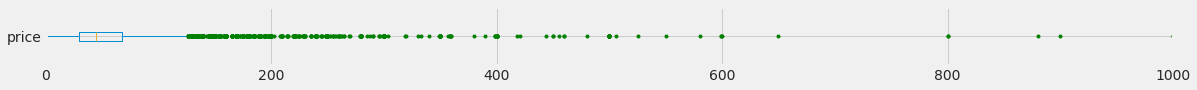

In [145]:
# Box plot of price per night
green_square = dict(markerfacecolor='g', markeredgecolor='g', marker='.')
df['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=green_square, figsize=(18,1))

### Price by Borough

Let's look at a statistical summary of price per night by borough. We see that Friedricshain-Kreuzberg has the most listings (5054), followed by Mitte, Neukolln, Pankow, Tempelohof-Schoneberg, and Charlottenburg-Wilmersdorf. The mean is always higher than then mediean, indicating a right skew with higher-end outliers. Pankow has the highest median price (50). Charlottenburg-Wilmersdorf and Lichtenberg are notably variable with high standard deviation. It looks like there are some prominent higher-end outliers as well. Keep in mind that the borough Pankow includes the neighborhood Prenzlauer Berg. 

In [146]:
# Statistical summary of price by borough 
df_borough_grouped = df.groupby("borough")
df_borough_grouped['price'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Charlottenburg-Wilm.,1388.0,73.260086,325.047388,13.0,32.0,46.0,70.00,9000.0
Friedrichshain-Kreuzberg,5054.0,58.245152,126.534019,0.0,33.0,47.0,68.00,8600.0
Lichtenberg,584.0,52.801370,208.301054,10.0,25.0,35.0,50.00,5000.0
Marzahn - Hellersdorf,60.0,44.250000,26.857834,14.0,25.0,35.5,56.00,145.0
Mitte,4143.0,63.686218,74.592668,0.0,30.0,49.0,75.00,3000.0
Neukölln,3324.0,45.907641,30.048104,9.0,29.0,40.0,55.00,500.0
Pankow,3193.0,64.459443,107.720472,0.0,35.0,50.0,75.00,4240.0
Reinickendorf,201.0,47.169154,66.344565,10.0,25.0,35.0,50.00,880.0
Spandau,77.0,49.038961,50.220158,12.0,25.0,35.0,50.00,400.0


Let's dig further and create a scatter plot of price by borough. We see some notable outliers in Lichtenberg, Charlottenberg-Wilmersdorf, Mitte, Friedrichshain-Kreuzberg, and Pankow that could skew our analysis.

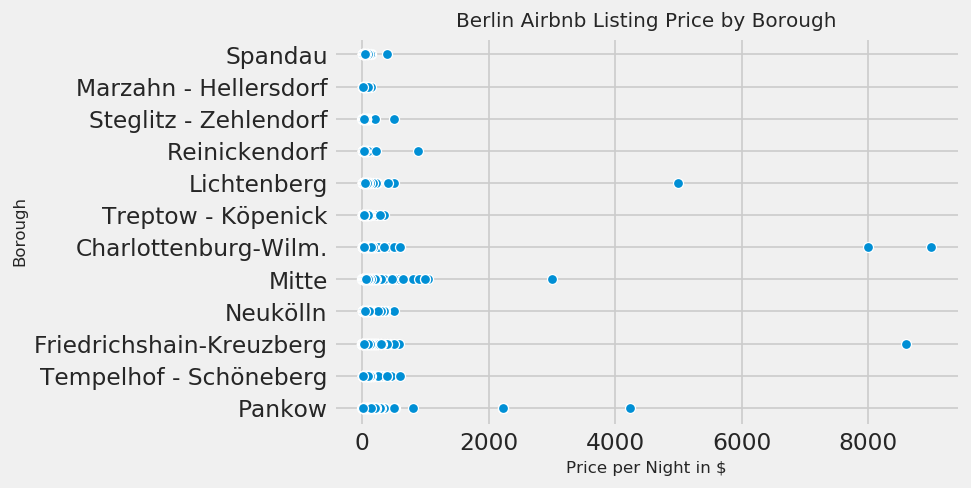

In [147]:
# Scatterplot of price by borough 
plt.figure(dpi=120)
sns.scatterplot(x="price", y="borough", data=df)
plt.title("Berlin Airbnb Listing Price by Borough", fontsize=12)
plt.ylabel("Borough", fontsize=10)
plt.xlabel("Price per Night in $", fontsize=10)
plt.show()

Based on our analysis above, let's remove listings with outlier prices (top 5%).

In [148]:
# Remove outlier prices (top 5%) so not to skew data
all_listings = df.shape[0]
df = df[df["price"] <= df["price"].quantile(.95)]
print("{} listings with outlier price were removed.".format(all_listings - df.shape[0]))

1009 listings with outlier price were removed.


### Reviews per Month by Borough

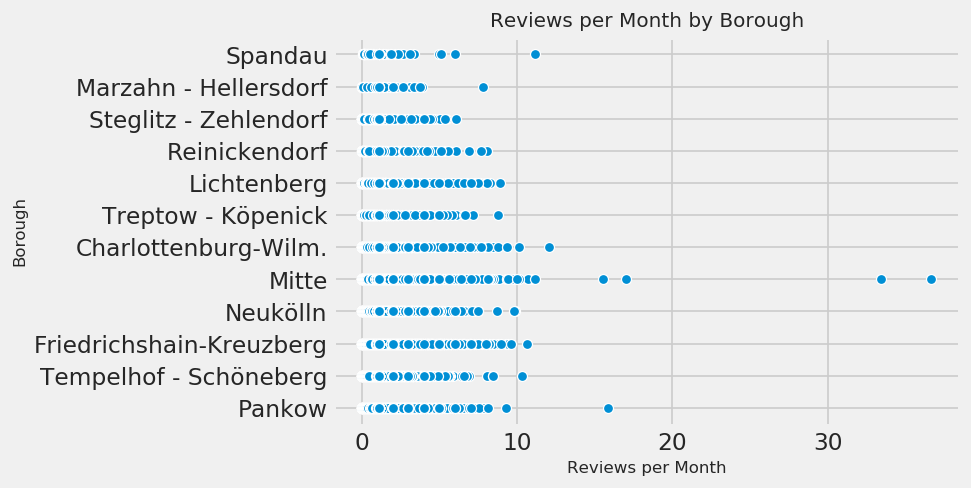

In [149]:
# Scatterplot of reviews per month by borough 
plt.figure(dpi=120)
sns.scatterplot(x="reviews_per_month", y="borough", data=df)
plt.title("Reviews per Month by Borough", fontsize=12)
plt.ylabel("Borough", fontsize=10)
plt.xlabel("Reviews per Month", fontsize=10)
plt.show()

Based on our analysis, let's remove listings with outlier number of reviews per month (top 5%). 

In [150]:
# Remove outlier reviews per month values (top 5%) so not to skew data
all_listings = df.shape[0]
df = df[df["reviews_per_month"] <= df["reviews_per_month"].quantile(.95)]
print("{} listings with outlier number of reviews per month were removed.".format(all_listings - df.shape[0]))

957 listings with outlier number of reviews per month were removed.


## 5. Feature Engineering & Exploration: Occupancy, Revenue per Month

Let's add two additional variables: occupancy and revenue per month. In order to estimate revenue per month, we'll first calculate occupancy using the following: 

**Occupancy (nights per month) =  Avg lenth of stay (nights) * (Reviews per month / Review rate)**

- The original data source _Inside Airbnb_ assumes a review rate, or the percentage of visitors that actually leave a review after their stay, of 50%. 
- Reviews per month is already provided in our above dataframe. 
- Average length of stay in Berlin in 2017 according to Airbnb is 4.2 nights. 

Once we've calculated occupancy, we can calculate revenue per month: 

**Revenue per month = Occupancy (nights per month) * Price (per night)**

- Price per night is already provided in our above dataframe. 
- Occupancy has been calculated above.

In [151]:
# Set variables for average length of stay and review rate
avg_length_of_stay = 4.2
review_rate = 0.5

# Create new column for occupancy
df['occupancy'] = avg_length_of_stay * (df['reviews_per_month']/review_rate)

In [152]:
# Occupancy (nights per month) cannot be greater than the days per month of 30. Let's check and drop these
len(df[df['occupancy'] > 30])

152

In [153]:
# Drop occupancy over 30
df.drop(df[df['occupancy'] > 30].index, axis=0, inplace=True)

In [154]:
# Create new column for revenue per month
df['revenue_per_month'] = df['occupancy'] * df['price']

In [155]:
df.head()

,superhost,neighborhood,borough,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_location,reviews_per_month,occupancy,revenue_per_month
1,0.0,Prenzlauer Berg Nordwest,Pankow,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,17.0,6,100.0,10.0,1.42,11.928,202.776
2,0.0,Prenzlauer Berg Südwest,Pankow,52.534996,13.417579,Apartment,Entire home/apt,4,1.0,1.0,90.0,143,92.0,10.0,1.25,10.500,945.000
3,0.0,Schöneberg-Nord,Tempelhof - Schöneberg,52.498855,13.349065,Apartment,Private room,2,1.0,1.0,26.0,25,88.0,9.0,0.39,3.276,85.176
4,1.0,Helmholtzplatz,Pankow,52.543157,13.415091,Apartment,Private room,2,1.0,1.0,42.0,197,96.0,10.0,1.75,14.700,617.400
6,0.0,Prenzlauer Berg Nordwest,Pankow,52.547846,13.405562,Apartment,Entire home/apt,2,1.0,0.0,70.0,23,93.0,9.0,0.23,1.932,135.240


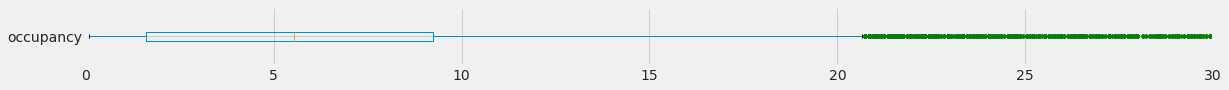

In [156]:
# Box plot of occupancy (nights per month)
green_square = dict(markerfacecolor='g', markeredgecolor='g', marker='.')
df['occupancy'].plot(kind='box', xlim=(0, 30), vert=False, flierprops=green_square, figsize=(18,1))

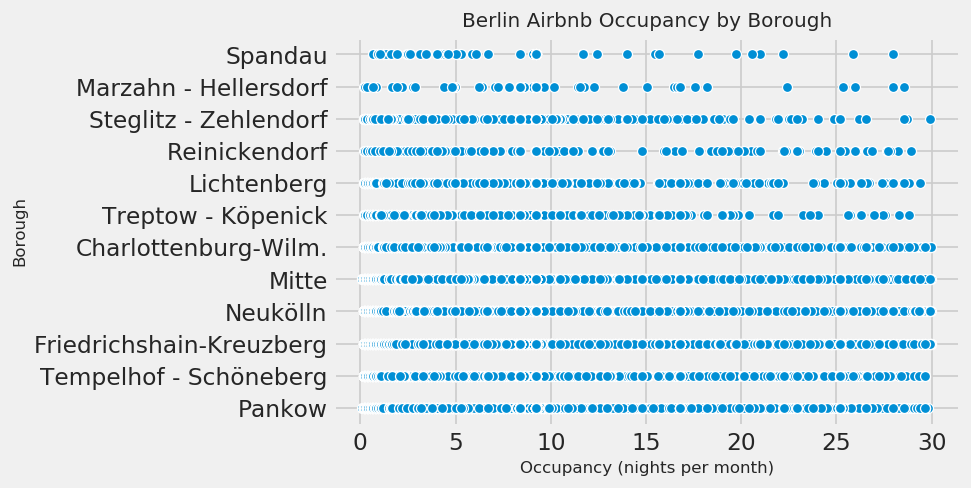

In [157]:
# Scatterplot of occupancy by borough 
plt.figure(dpi=120)
sns.scatterplot(x="occupancy", y="borough", data=df)
plt.title("Berlin Airbnb Occupancy by Borough", fontsize=12)
plt.ylabel("Borough", fontsize=10)
plt.xlabel("Occupancy (nights per month)", fontsize=10)
plt.show()

In [158]:
# Remove outlier reviews per month values (top 5%) so not to skew data
all_listings = df.shape[0]
df = df[df["occupancy"] <= df["occupancy"].quantile(.95)]
print("{} listings with outlier occupancy were removed.".format(all_listings - df.shape[0]))

905 listings with outlier occupancy were removed.


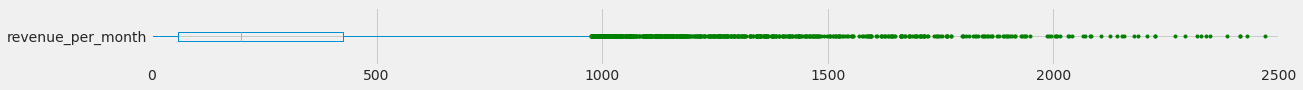

In [159]:
# Box plot of revenue per month
green_square = dict(markerfacecolor='g', markeredgecolor='g', marker='.')
df['revenue_per_month'].plot(kind='box', xlim=(0, 2500), vert=False, flierprops=green_square, figsize=(18,1))

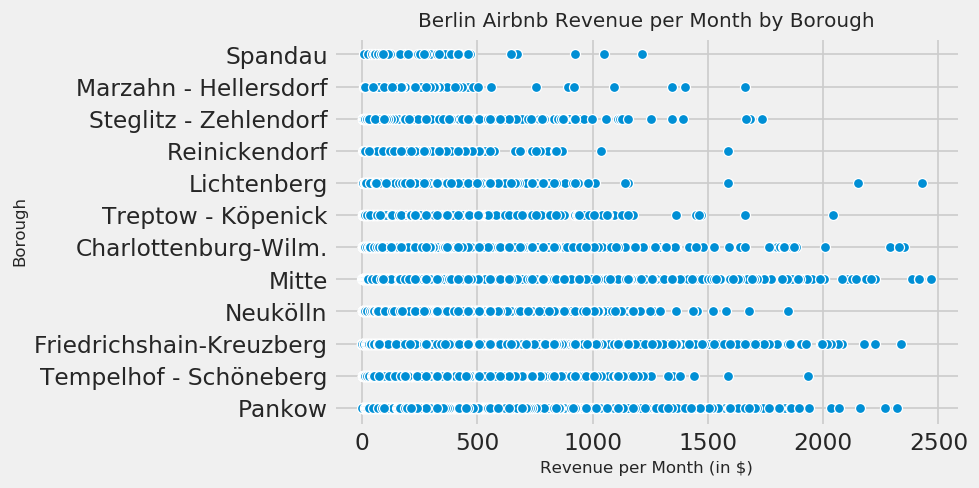

In [160]:
# Scatterplot of revenue per month by borough 
plt.figure(dpi=120)
sns.scatterplot(x="revenue_per_month", y="borough", data=df)
plt.title("Berlin Airbnb Revenue per Month by Borough", fontsize=12)
plt.ylabel("Borough", fontsize=10)
plt.xlabel("Revenue per Month (in $)", fontsize=10)
plt.show()

In [161]:
# Remove outlier reviews per month values (top 5%) so not to skew data
all_listings = df.shape[0]
df = df[df["revenue_per_month"] <= df["revenue_per_month"].quantile(.95)]
print("{} listings with outlier revenue per month were removed.".format(all_listings - df.shape[0]))

861 listings with outlier revenue per month were removed.


In [162]:
# Statistical summary of occupancy
df['occupancy'].describe()

count    16341.000000
mean         5.542693
std          4.598395
min          0.084000
25%          1.428000
50%          4.368000
75%          9.236859
max         21.420000
Name: occupancy, dtype: float64

In [163]:
# Statistical summary of revenue per month
df['revenue_per_month'].describe()

count    16341.000000
mean       250.852367
std        230.845993
min          0.000000
25%         57.456000
50%        184.737184
75%        378.000000
max        931.056000
Name: revenue_per_month, dtype: float64

### Top 30 Neighborhoods in Terms of Revenue per Month and Occupancy (nights per month)

Out of the 134 neighborhoods in Berlin, let's look at the top 30 in terms of mean revenue per month. 

In [164]:
# Mean revenue per month by neighborhood
# Grouping functions
m = {"occupancy":["mean"], "revenue_per_month":["mean"]}

# Grouping
neighborhood_grouping = df[["neighborhood", "occupancy", "revenue_per_month"]]
neighborhood_grouping = neighborhood_grouping.groupby("neighborhood", as_index=False).agg(m)
neighborhood_grouping.columns = ["neighborhood","occupancy", "revenue_per_month"]
neighborhood_grouping = neighborhood_grouping.sort_values("neighborhood")

# Top 30 highest median price per night neighborhoods
neighborhood_grouping[["neighborhood","revenue_per_month"]].sort_values("revenue_per_month", ascending=False).head(40)

,neighborhood,revenue_per_month
3,Allende-Viertel,692.764440
61,MV 2,535.080000
8,Altstadt-Kietz,531.119404
42,Heerstraße Nord,461.842960
20,Buckow,430.453757
127,Zehlendorf Südwest,400.017883
34,Friedrichshagen,385.201747
19,Buchholz,383.868783
11,Biesdorf,361.951679
22,Charlottenburg Nord,360.388780


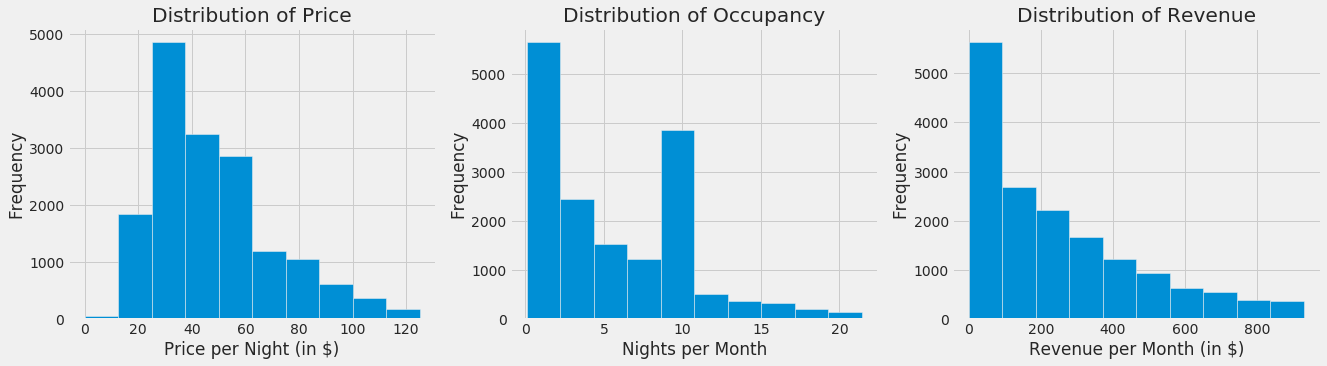

In [165]:
# Distribution plots of price and reviews per month
df_price = df['price']
df_occupancy = df['occupancy']
df_revenue_per_month = df['revenue_per_month']
fig = plt.figure() 

ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 3 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 3 columns, second plot)
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 3 columns, third plot)

# Subplot 1: Distribution of price
df_price.plot(kind='hist', figsize=(20, 5), ax=ax0) 
ax0.set_title('Distribution of Price')
ax0.set_xlabel('Price per Night (in $)')
ax0.set_ylabel('Frequency')

# Subplot 2: Distribution of occupancy
df_occupancy.plot(kind='hist', figsize=(20, 5), ax=ax1) 
ax1.set_title('Distribution of Occupancy')
ax1.set_xlabel('Nights per Month')
ax1.set_ylabel('Frequency')

# Subplot 3: Distribution of revenue per month
df_revenue_per_month.plot(kind='hist', figsize=(20, 5), ax=ax2) 
ax2.set_title ('Distribution of Revenue')
ax2.set_xlabel('Revenue per Month (in $)')
ax2.set_ylabel('Frequency')

plt.show()

### Superhost Analysis

The thinking here is that an Airbnb superhost would garner similar credibility or status as a business or real estate developer. Understanding superhost price dynamics, ability to charge a premium, occupancy, and revenue per month would provide a better picture for a business entering Berlin. 

Text(0, 0.5, 'Revenue per Month')

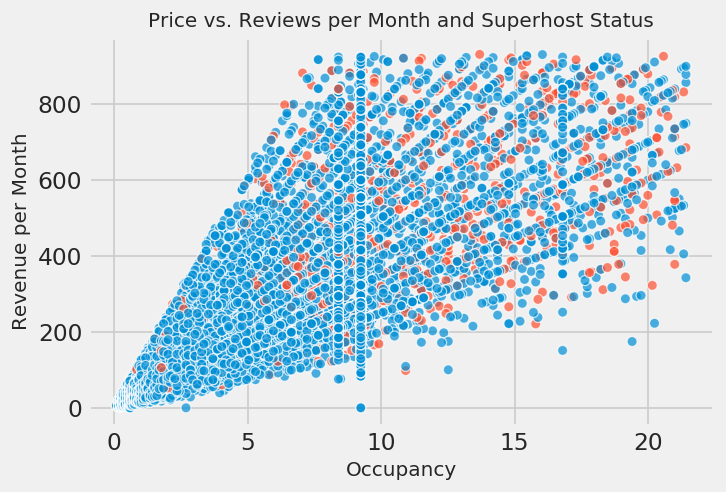

In [166]:
# Scatter plot of price vs. review per month stratified by superhost status
plt.figure(dpi=120)
sns.scatterplot(df["occupancy"], df["revenue_per_month"], hue = df["superhost"], alpha=0.7, legend=False)
plt.title("Price vs. Reviews per Month and Superhost Status", fontsize=12)
plt.xlabel("Occupancy", fontsize=12)
plt.ylabel("Revenue per Month", fontsize=12)

A superhost garners a nearly 10% premium compared to a standard host.

In [167]:
# Difference in median price by superhost status
df.groupby('superhost')['price'].agg(np.median)

superhost
0.0    40.0
1.0    43.0
Name: price, dtype: float64

A superhost generates more than twice the occupancy of a standard host. 

In [168]:
# Difference in median occupancy by superhost status
df.groupby('superhost')['occupancy'].agg(np.median)

superhost
0.0    3.864
1.0    8.652
Name: occupancy, dtype: float64

A superhost generates more than twice the revenue per month of a standard host.

In [169]:
# Difference in median revenue per month by superhost status
df.groupby('superhost')['revenue_per_month'].agg(np.median)

superhost
0.0    166.263466
1.0    383.796000
Name: revenue_per_month, dtype: float64

Let's look at how superhost status compares in each borough. For example, 10% of hosts in Charlottenburg-Wilmersdorf are superhosts compared to 6% in Neukolln. 

In [170]:
# Statistical summary of superhost status by borough 
df_borough_grouped = df.groupby("borough")
df_borough_grouped['superhost'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Charlottenburg-Wilm.,1033.0,0.099710,0.299758,0.0,0.0,0.0,0.0,1.0
Friedrichshain-Kreuzberg,4138.0,0.070807,0.256533,0.0,0.0,0.0,0.0,1.0
Lichtenberg,501.0,0.065868,0.248300,0.0,0.0,0.0,0.0,1.0
Marzahn - Hellersdorf,45.0,0.088889,0.287799,0.0,0.0,0.0,0.0,1.0
Mitte,3093.0,0.084384,0.278008,0.0,0.0,0.0,0.0,1.0
Neukölln,2987.0,0.060931,0.239243,0.0,0.0,0.0,0.0,1.0
Pankow,2525.0,0.093069,0.290587,0.0,0.0,0.0,0.0,1.0
Reinickendorf,150.0,0.133333,0.341073,0.0,0.0,0.0,0.0,1.0
Spandau,63.0,0.126984,0.335630,0.0,0.0,0.0,0.0,1.0


Let's create a bar plot to visualize how occupancy varies by superhost status in each borough. We see that a superhost garners roughly twice the occupancy of standard hosts in most of Berlin's boroughs.

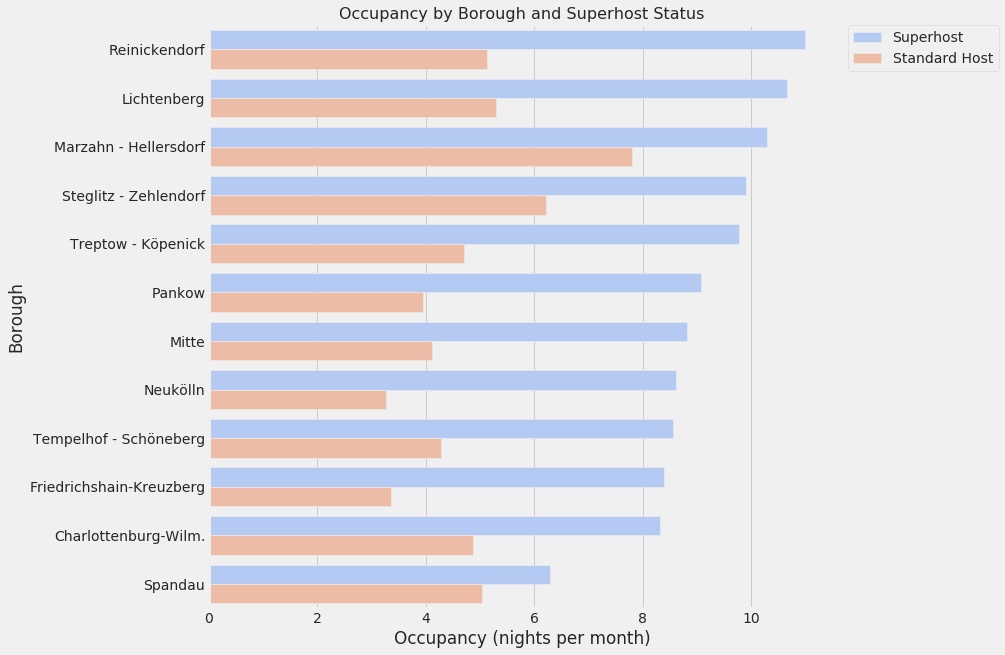

In [171]:
# Group by borough and superhost status
df_borough_superhost_grouped = pd.DataFrame(df.groupby(['borough', 'superhost'])['occupancy'].agg(np.median))
df_borough_superhost_grouped.sort_values(by='occupancy', ascending=False, inplace=True)
df_borough_superhost_grouped.reset_index(inplace=True)

# Bar plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='occupancy', y='borough', hue='superhost', hue_order=[1, 0], data=df_borough_superhost_grouped, palette="coolwarm")
ax.set_title('Occupancy by Borough and Superhost Status', fontsize=16)
ax.set(xlabel='Occupancy (nights per month)')
ax.set(ylabel='Borough')

# Rename legend labels & put legend outside plot
handles, labels = ax.get_legend_handles_labels()
ax.legend((handles), ('Superhost', 'Standard Host'), bbox_to_anchor=(1.02, 1), borderaxespad=0)

Similarly, let's create a bar plot to visualize how revenue varies by superhost status in each borough. We see that a superhost generates roughly twice the revenue of standard hosts in most of Berlin's boroughs.

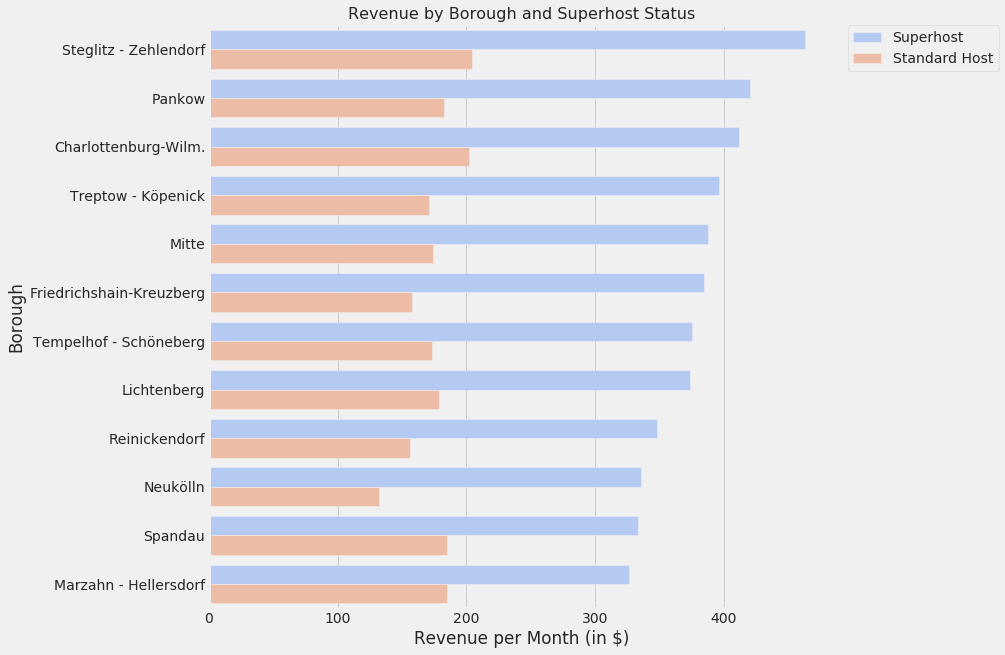

In [172]:
# Group by borough and superhost status
df_borough_superhost_grouped = pd.DataFrame(df.groupby(['borough', 'superhost'])['revenue_per_month'].agg(np.median))
df_borough_superhost_grouped.sort_values(by='revenue_per_month', ascending=False, inplace=True)
df_borough_superhost_grouped.reset_index(inplace=True)

# Bar plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='revenue_per_month', y='borough', hue='superhost', hue_order=[1, 0], data=df_borough_superhost_grouped, palette="coolwarm")
ax.set_title('Revenue by Borough and Superhost Status', fontsize=16)
ax.set(xlabel='Revenue per Month (in $)')
ax.set(ylabel='Borough')

# Rename legend labels & put legend outside plot
handles, labels = ax.get_legend_handles_labels()
ax.legend((handles), ('Superhost', 'Standard Host'), bbox_to_anchor=(1.02, 1), borderaxespad=0)

### Capacity Analysis

Let's create a bar plot to visualize occupancy (nights per month) by capacity ('accommodates' in our dataframe). We see that occupancy tends to be higher for a single visitor, likely a business or solor traveler, and for groups of 8 and above (more visitors in the group to leave a review).

Text(11, 4.3, 'Overall Median')

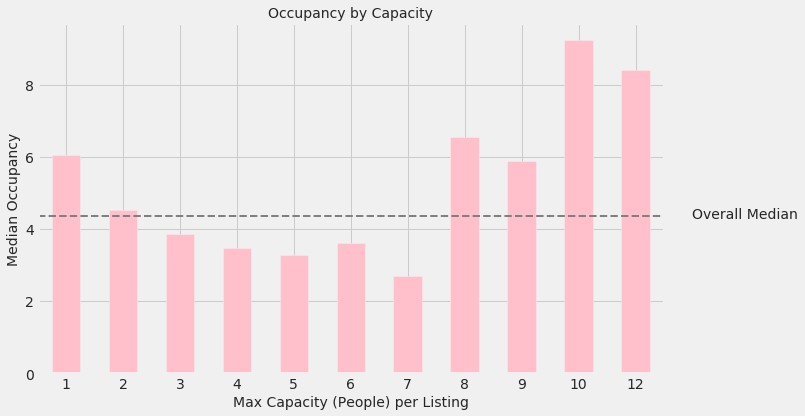

In [173]:
# Create dataframe grouped by capacity ('accommodates') and isolating median occupancy
df_capacity_grouped = pd.DataFrame(df.groupby(['accommodates'])['occupancy'].agg(np.median))

# Bar plot
df_capacity_grouped.plot(kind='bar', figsize=(10,6), color='pink', legend=False)
plt.xlabel('Max Capacity (People) per Listing', fontsize=14)
plt.xticks(rotation='horizontal')
plt.ylabel('Median Occupancy', fontsize=14)
plt.title('Occupancy by Capacity', fontsize=14)

# Draw and label the median value
median_occ = df['occupancy'].median()
plt.axhline(y = median_occ, xmin=0, xmax=5, linewidth=2, linestyle='--', color='gray')
plt.text(x=11, y=4.3, s='Overall Median')

Similarly, let's create a bar plot to visualize revenue per month by capacity. We see that revenue tends to be higher for max capacity of 3 and above, which is typically for families and groups of travelers / students. 

Text(11, 178, 'Overall Median')

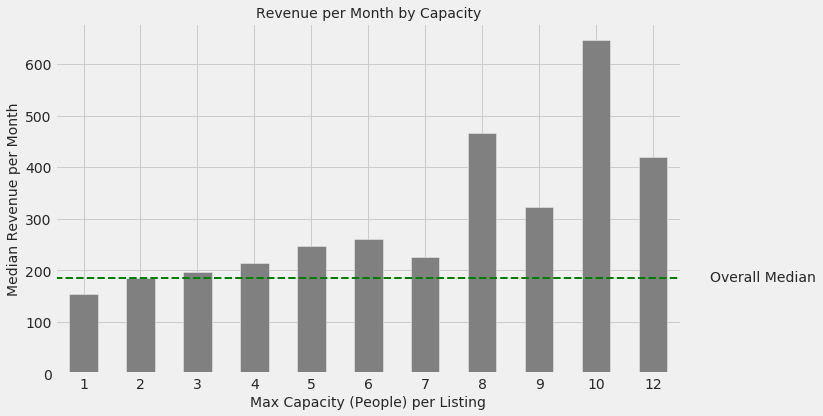

In [174]:
# Create dataframe grouped by capacity ('accommodates') and isolating median revenue per month
df_capacity_grouped = pd.DataFrame(df.groupby(['accommodates'])['revenue_per_month'].agg(np.median))

# Bar plot
df_capacity_grouped.plot(kind='bar', figsize=(10,6), color='gray', legend=False)
plt.xlabel('Max Capacity (People) per Listing', fontsize=14)
plt.xticks(rotation='horizontal')
plt.ylabel('Median Revenue per Month', fontsize=14)
plt.title('Revenue per Month by Capacity', fontsize=14)

# Draw and label the median value
median_revenue = df['revenue_per_month'].median()
plt.axhline(y=median_revenue, xmin=0, xmax=5, linewidth=2, linestyle='--', color='green')
plt.text(x=11, y=178, s='Overall Median')

### Listings by longitude, latitude, occupacy, and revenue per month

Let's create a bubble plot to visualize listings across Berlin by longitude and latitude and stratify them by occupancy (bubble size) and revenue per month (bubble color). We see that most people stay in the very center of Berlin in boroughs like Mitte and Pankow (particularly, southwest Pankow in the neighborhood Prenzlauer Berg), as well as in the southwest in Charlottenberg and southeast in Friedricshain-Kreuzberg. As we'd expect, higher revenue listings tend to also have higher occupancy. Further below, our map plots will show a clearer geogprahpic picture of Berlin's Airbnb market. 

Text(0, 0.5, 'Latitude')

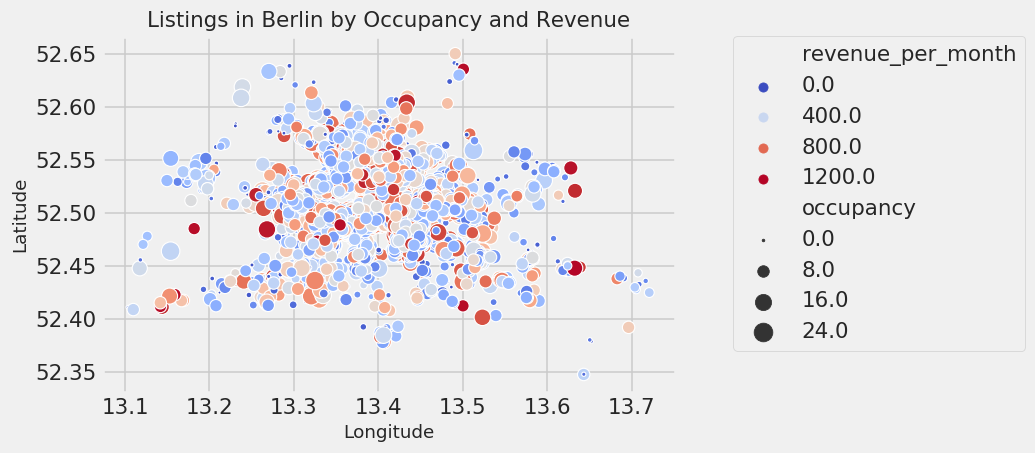

In [175]:
plt.figure(dpi=110)
ax = sns.scatterplot(x="longitude", y="latitude", size='occupancy', sizes=(3, 150), hue='revenue_per_month', palette="coolwarm", data=df)
ax.legend(bbox_to_anchor=(1.1, 1), borderaxespad=0)
plt.title('Listings in Berlin by Occupancy and Revenue', fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

## 6. Linear Regression Model

Let's create a heatmap of the pearson correlation between all variables. Overall, the pearson correlations are fairly weak, though we do see that there is moderate correlation between 1) occupancy and superhost status, 2) revenue and superhost status, 3) price and capacity ('accommodates') and bedrooms, and 4) bedrooms and capacity. As we'd expect, the correlation between occupancy and reviews_per_month, revenue_per_month and price, and revenue_per_month and occupancy are high because we engineered them. Overall, the correlations are fairly weak and we'd need to do further visual plots, potential feature engineering, and bring in additional data sources in order to develop robust models.  

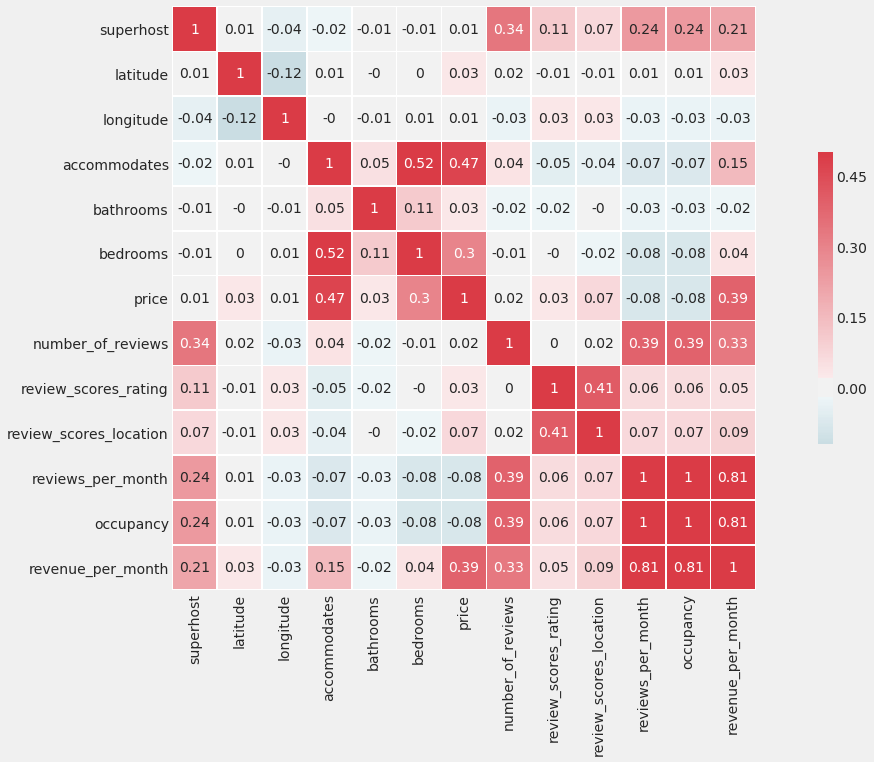

In [176]:
# Pearson correlation of all variables
corr = round(df.corr(), 2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, center=0,vmax=0.5, square=True, linewidths=.5, cbar_kws={"shrink":.5}, cmap=cmap, annot=True)

In [177]:
# Pearson correlation of revenue per month to other variables in descending order. The R-squared value is simply the square of the Pearson correlation
df.corr()['revenue_per_month'].sort_values(ascending=False).to_frame()

,revenue_per_month
revenue_per_month,1.000000
reviews_per_month,0.808935
occupancy,0.808935
price,0.385539
number_of_reviews,0.332563
superhost,0.211592
accommodates,0.151239
review_scores_location,0.085002
review_scores_rating,0.053046
bedrooms,0.044553


For illustrative purposes, let's fit a multiple linear regression using capacity, number of reviews, and superhost status as our predictors and our labeled target as revenue per month.

In [178]:
# Feature selection - predictors
features = df[['accommodates', 'number_of_reviews','superhost']]
X = np.asarray(features)
X[0:5]

array([[  2.,   6.,   0.],
       [  2.,  25.,   0.],
       [  2., 197.,   1.],
       [  2.,  23.,   0.],
       [  5.,  48.,   0.]])

In [179]:
# Select labeled target y as price
y = df['revenue_per_month'].values
y[0:5]

array([202.776,  85.176, 617.4  , 135.24 , 355.32 ])

In [180]:
# Split into train and test sets using an 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print ('Training set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Training set: (13072, 3) (13072,)
Test set: (3269, 3) (3269,)


In [181]:
# Normalize using scikit learn preprocessing libraries StandardScaler, fit, transform. 
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.32842064, -0.19197896, -0.2964405 ],
       [-0.32842064,  0.91741347, -0.2964405 ],
       [-0.32842064, 10.96033448,  3.37335819],
       [-0.32842064,  0.80063532, -0.2964405 ],
       [ 2.47991095,  2.26036221, -0.2964405 ]])

In [182]:
# Create an object for LinearRegression()
lr = LinearRegression()

# Train model
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [183]:
# Make predictions on test set using our model
y_hat = lr.predict(X_test)
y_hat[0:5]

array([240.07027866, 324.32771764, 195.50446636, 234.37803725,
       211.05389472])

In [184]:
# R-squared for training set
print('The R-square is: ', lr.score(X_train, y_train))

The R-square is:  0.14003813445103208


In [185]:
# R-squared for test set
print('The R-square is: ', lr.score(X_test, y_test))

The R-square is:  0.1483735170201309


In [186]:
# Define function DistPlot
def DistPlot(YellowFunction, BlueFunction, YellowName, BlueName, Title):
    plt.figure(figsize=(8, 6))
    ax1 = sns.distplot(YellowFunction, hist=False, color="y", label=YellowName)
    sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    plt.title(Title, fontsize=12)
    plt.xlabel('Revenue per Month', fontsize=12)
    plt.ylabel('Proportion of Listings', fontsize=12)
    plt.show()
    plt.close()

As expected, we see that our model does a poor job of predicting revenue per month on new data (our test set), low-balling revenue below 380 dollars per month and overshooting at above 380 dollars per month in the test set. 

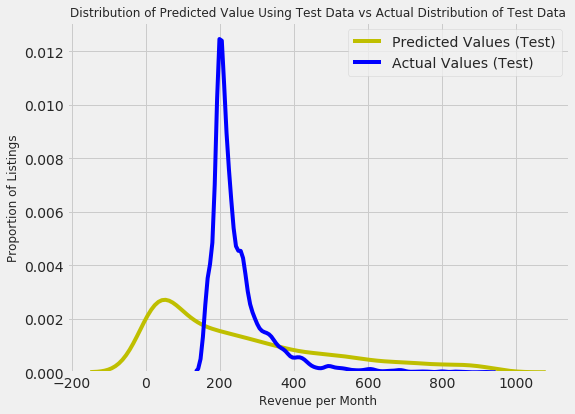

In [187]:
# Distribution plot of training data
Title='Distribution of Predicted Value Using Test Data vs Actual Distribution of Test Data'
DistPlot(y_test, y_hat, "Predicted Values (Test)", "Actual Values (Test)", Title)

## 7. Choropleth Map of Revenue by Borough

In [188]:
# Use geopy to obtain latitude and longitude of Berlin
address = 'Berlin, Germany'
geolocator = Nominatim(user_agent="berlin_explorer") # Need to define user_agent in order to instantiate geocoder. Here we use ny_explorer as the name of the user_agent
location = geolocator.geocode(address)
lat = location.latitude
long = location.longitude

print('The latitude and longitude of Berlin are {}, {}.'.format(lat, long))

The latitude and longitude of Berlin are 52.5170365, 13.3888599.


In [189]:
# Visualize Berlin with interactive zoom and pop-up map using folium and latitude, longitude values we obtained above
map_berlin = folium.Map(location=[lat, long], zoom_start=11)
map_berlin

In [190]:
# Source: https://data.technologiestiftung-berlin.de/dataset/bezirksgrenzen

# Load json data from url
with urllib.request.urlopen("https://raw.githubusercontent.com/pape1412/airbnb/master/data/berlin_neighbourhood_groups.geojson") as url:
    berlin_geojson = json.loads(url.read().decode())

In [191]:
# Create variable borough_data that includes just borough data, which is found in the geojson file's features' key
borough_data = berlin_geojson['features']
borough_data[0]

{'type': 'Feature',
 'properties': {'gml_id': 's_wfs_alkis_bezirk.F176__1',
  'Gemeinde_name': 'Reinickendorf',
  'Gemeinde_schluessel': '012',
  'Land_name': 'Berlin',
  'Land_schluessel': '11',
  'Schluessel_gesamt': '11000012'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[13.320744327762688, 52.6265990635977],
     [13.320450024315486, 52.62661432040652],
     [13.320156209034547, 52.626629556435226],
     [13.319861608831037, 52.62664483454826],
     [13.319593627953324, 52.62665871834925],
     [13.31936358713492, 52.62669889913262],
     [13.31927131961791, 52.62671458294175],
     [13.319136649241361, 52.626737909717335],
     [13.31907692913779, 52.62674826503127],
     [13.319052550459054, 52.62675248649931],
     [13.318885692127882, 52.626781389162176],
     [13.31888113399995, 52.62678273605833],
     [13.318360954229783, 52.626934861636634],
     [13.318314050049958, 52.626948527392216],
     [13.318291711216435, 52.62695503441042],
     [13.318159775449557,

In [192]:
# Transform geojson data into a dataframe of just borough names

# Empty array with column names
column_names = ['Borough']

# Instantiate dataframe
boroughs = pd.DataFrame(columns = column_names)

boroughs

,Borough


In [193]:
# Build boroughs dataframe

# Pull in respective data from json using for loop. In the json, boroughs are under 'Gemeinde_name'
for data in borough_data:
    borough = data['properties']['Gemeinde_name'] 
    
    # Fill boroughs dataframe we created above with data
    boroughs = boroughs.append({'Borough': borough}, ignore_index=True)

In [194]:
# Newly created boroughs dataframe
boroughs

,Borough
0,Reinickendorf
1,Charlottenburg-Wilmersdorf
2,Treptow-Köpenick
3,Pankow
4,Neukölln
5,Lichtenberg
6,Marzahn-Hellersdorf
7,Spandau
8,Steglitz-Zehlendorf
9,Mitte


In [195]:
df_borough_grouped['revenue_per_month'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Charlottenburg-Wilm.,1033.0,281.264591,244.414587,4.200,72.072,216.720000,422.100000,923.68592
Friedrichshain-Kreuzberg,4138.0,246.588295,230.116799,0.000,55.146,176.400000,378.000000,931.05600
Lichtenberg,501.0,243.335896,214.730339,3.360,64.260,184.737184,352.800000,923.68592
Marzahn - Hellersdorf,45.0,267.508264,216.370973,8.316,106.260,230.921480,366.912000,919.80000
Mitte,3093.0,254.989654,234.199459,2.268,57.960,189.000000,378.711227,925.68000
Neukölln,2987.0,211.667460,206.289337,2.520,46.032,147.789747,323.290072,923.68592
Pankow,2525.0,279.574456,247.295694,0.000,64.512,203.210902,446.292000,926.10000
Reinickendorf,150.0,237.994945,211.178658,6.048,64.260,184.768592,356.055000,869.40000
Spandau,63.0,232.461090,179.793813,8.064,78.834,241.920000,327.908502,923.68592


In [196]:
df_borough_grouped_rev = df_borough_grouped.agg(np.mean)
df_borough_grouped_rev

,superhost,latitude,longitude,accommodates,bathrooms,bedrooms,price,number_of_reviews,review_scores_rating,review_scores_location,reviews_per_month,occupancy,revenue_per_month
borough,,,,,,,,,,,,,
Charlottenburg-Wilm.,0.099710,52.502959,13.307703,2.383349,1.064936,1.051307,47.291384,11.052275,93.591892,9.456815,0.733863,6.164451,281.264591
Friedrichshain-Kreuzberg,0.070807,52.504250,13.434344,2.318028,1.076181,1.072641,48.477042,9.149589,94.470315,9.633699,0.623158,5.234530,246.588295
Lichtenberg,0.065868,52.510134,13.491962,2.321357,1.038081,1.047904,39.816367,7.636727,94.233427,9.201416,0.747195,6.276439,243.335896
Marzahn - Hellersdorf,0.088889,52.525968,13.581501,2.600000,1.022222,1.200000,39.555556,11.822222,94.790498,9.014493,0.883275,7.419511,267.508264
Mitte,0.084384,52.535592,13.373745,2.318138,1.065734,1.058519,46.709344,9.298739,93.882683,9.436246,0.664387,5.580848,254.989654
Neukölln,0.060931,52.478382,13.435381,2.279879,1.044490,1.083125,42.500837,8.025444,94.584186,9.452370,0.607552,5.103433,211.667460
Pankow,0.093069,52.545612,13.421578,2.438812,1.067513,1.133861,51.925149,10.339010,94.665365,9.575054,0.673723,5.659271,279.574456
Reinickendorf,0.133333,52.576871,13.334531,2.393333,1.044379,1.106667,36.880000,10.913333,93.939761,9.156654,0.808384,6.790429,237.994945
Spandau,0.126984,52.529586,13.192739,2.888889,1.032991,1.238095,40.238095,7.761905,92.950758,8.774014,0.779094,6.544386,232.461090


In [197]:
# We only need the revenue_per_month column. 
df_borough_grouped_rev = pd.DataFrame(df_borough_grouped_rev,columns=['revenue_per_month'])  
df_borough_grouped_rev.reset_index(inplace=True)   # default index, otherwise groupby column becomes index
df_borough_grouped_rev

,borough,revenue_per_month
0,Charlottenburg-Wilm.,281.264591
1,Friedrichshain-Kreuzberg,246.588295
2,Lichtenberg,243.335896
3,Marzahn - Hellersdorf,267.508264
4,Mitte,254.989654
5,Neukölln,211.667460
6,Pankow,279.574456
7,Reinickendorf,237.994945
8,Spandau,232.461090
9,Steglitz - Zehlendorf,289.037691


In [198]:
# Check to see if the borough names from our Airbnb dataframe match those from the boroughs dataframe created from the geojson
set(df_borough_grouped_rev.borough) - set(boroughs.Borough)

{'Charlottenburg-Wilm.',
 'Marzahn - Hellersdorf',
 'Steglitz - Zehlendorf',
 'Tempelhof - Schöneberg',
 'Treptow - Köpenick'}

Above, the names of 5 boroughs in the df_borough_grouped_rev dataframe don't match those in the boroughs dataframe created from the geojson, which means the mapping wouldn't work properly. Let's change the names of those select boroughs so they match the geojson. 

In [199]:
# Change select borough names so they exactly the property name in the geojson file (sensitive to spaces, etc.)
df_borough_grouped_rev.borough = df_borough_grouped_rev.borough.replace("Charlottenburg-Wilm.", "Charlottenburg-Wilmersdorf")
df_borough_grouped_rev.borough = df_borough_grouped_rev.borough.replace("Treptow - Köpenick", "Treptow-Köpenick")
df_borough_grouped_rev.borough = df_borough_grouped_rev.borough.replace("Marzahn - Hellersdorf", "Marzahn-Hellersdorf")
df_borough_grouped_rev.borough = df_borough_grouped_rev.borough.replace("Steglitz - Zehlendorf", "Steglitz-Zehlendorf")
df_borough_grouped_rev.borough = df_borough_grouped_rev.borough.replace("Tempelhof - Schöneberg", "Tempelhof-Schöneberg")
df_borough_grouped_rev

,borough,revenue_per_month
0,Charlottenburg-Wilmersdorf,281.264591
1,Friedrichshain-Kreuzberg,246.588295
2,Lichtenberg,243.335896
3,Marzahn-Hellersdorf,267.508264
4,Mitte,254.989654
5,Neukölln,211.667460
6,Pankow,279.574456
7,Reinickendorf,237.994945
8,Spandau,232.461090
9,Steglitz-Zehlendorf,289.037691


Let's create a choropleth map to visualize mean revenue by month by borough in Berlin. The highest mean revenue values are in Steglitz-Zehlendorf, Pankow (includes Prenzlauer Berg neighborhood), and Charlottenbug-Wilmersdorf. Neukolln features tehe lowest revenue per month.

In [200]:
map_berlin.choropleth(
       geo_data=berlin_geojson,
       data=df_borough_grouped_rev,
       columns=['borough','revenue_per_month'],
       key_on='feature.properties.Gemeinde_name',
       fill_color='RdBu',
       fill_opacity='0.7',
       line_opacity='0.2',
       legend_name='Mean Airbnb Revenue per Month in Berlin by Borough')

# Display choropleth map
map_berlin

/opt/conda/envs/Python36/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## 8. Map, Segment, and Cluster Prenzlauer Berg / Pankow by Venues

Scrape Pankow borough neighborhoods from Wikipedia and convert to dataframe

In [201]:
# Specify url and get html from page
url = "https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin"
html = urlopen(url)

In [202]:
# Create BeautifulSoup object using lxml parser we imported
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [203]:
# Print title of the page as a check
title = soup.title
print(title)

<title>Boroughs and neighborhoods of Berlin - Wikipedia</title>


In [204]:
# Print text from page as a further check to see if it's what we expect
text = soup.get_text()

In [205]:
# extracting the raw table inside that webpage
table = soup.find_all('table')
print(table)

[<table class="sortable wikitable" style="float:left;">
<tbody><tr>
<th class="sortable" style="border-bottom:1px solid gray; vertical-align:top;">Borough
</th>
<th class="sortable" style="border-bottom:1px solid gray; vertical-align:top;"><a href="/wiki/Population" title="Population">Population</a> <br/><small>31 March 2010</small>
</th>
<th class="sortable" style="border-bottom:1px solid gray; vertical-align:top;"><a href="/wiki/Area" title="Area">Area</a> <br/><small>in km²</small>
</th>
<th class="sortable" style="border-bottom:1px solid gray; vertical-align:top;"><a href="/wiki/Population_density" title="Population density">Density</a> <br/><small>per km²</small>
</th>
<th class="unsortable" style="border-bottom:1px solid gray; vertical-align:top;">Map
</th></tr>
<tr>
<td style="border-bottom:1px solid gray;"><a href="/wiki/Charlottenburg-Wilmersdorf" title="Charlottenburg-Wilmersdorf">Charlottenburg-Wilmersdorf</a>
</td>
<td style="border-bottom:1px solid gray; text-align:right;"

In [206]:
# Scrape just the table for Pankow, which is the 5th table and convert it into a dataframe
# Keep in mind that the borough Pankow also incldes a neighborhood called Pankow
pankow_table = pd.read_html(str(table[4]), index_col=None, header=0)[0]
pankow_table

,Locality,Area in km²,Population as of 2008,Density inhabitants per km²,Map
0,(0301) Prenzlauer Berg,11.00,142319,12991,NaN
1,(0302) Weißensee,7.93,45485,5736,NaN
2,(0303) Blankenburg,6.03,6550,1086,NaN
3,(0304) Heinersdorf,3.95,6580,1666,NaN
4,(0305) Karow,6.65,18258,2746,NaN
5,(0306) Stadtrandsiedlung Malchow,5.68,1166,205,NaN
6,(0307) Pankow,5.66,55854,9868,NaN
7,(0308) Blankenfelde,13.40,1917,144,NaN
8,(0309) Buch,18.20,13188,727,NaN
9,(0310) Französisch Buchholz,12.00,18766,1560,NaN


In [207]:
# Keep just the column with neighborhoods
pankow_table = pd.DataFrame(pankow_table['Locality'])
pankow_table

,Locality
0,(0301) Prenzlauer Berg
1,(0302) Weißensee
2,(0303) Blankenburg
3,(0304) Heinersdorf
4,(0305) Karow
5,(0306) Stadtrandsiedlung Malchow
6,(0307) Pankow
7,(0308) Blankenfelde
8,(0309) Buch
9,(0310) Französisch Buchholz


In [208]:
# Rename column to 'Neighborhood'
pankow_table.rename(columns={'Locality':'Neighborhood'}, inplace=True)

In [209]:
# Remove parentheses and numbers in neighborhood colum. When using regex, | is seperator for the items we want to replace
pankow_table['Neighborhood'] = pankow_table['Neighborhood'].replace('\d+|\(|\)','', regex=True)
pankow_table

,Neighborhood
0,Prenzlauer Berg
1,Weißensee
2,Blankenburg
3,Heinersdorf
4,Karow
5,Stadtrandsiedlung Malchow
6,Pankow
7,Blankenfelde
8,Buch
9,Französisch Buchholz


In [210]:
Borough = ['Pankow'] * 13
Latitude = [''] * 13
Longitude = [''] * 13
df_neighborhood = {'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
pankow = pd.DataFrame(data=df_neighborhood, columns =['Borough', 'Latitude', 'Longitude'], index=None )
pankow

,Borough,Latitude,Longitude
0,Pankow,,
1,Pankow,,
2,Pankow,,
3,Pankow,,
4,Pankow,,
5,Pankow,,
6,Pankow,,
7,Pankow,,
8,Pankow,,
9,Pankow,,


In [211]:
pankow = pd.concat([pankow_table, pankow], axis=1)
pankow

,Neighborhood,Borough,Latitude,Longitude
0,Prenzlauer Berg,Pankow,,
1,Weißensee,Pankow,,
2,Blankenburg,Pankow,,
3,Heinersdorf,Pankow,,
4,Karow,Pankow,,
5,Stadtrandsiedlung Malchow,Pankow,,
6,Pankow,Pankow,,
7,Blankenfelde,Pankow,,
8,Buch,Pankow,,
9,Französisch Buchholz,Pankow,,


In [212]:
Neighborhood = pankow['Neighborhood'].tolist()
Latitude = []
Longitude = []

for i in range(len(Neighborhood)):
    address = '{},Berlin,Germany'.format(Neighborhood[i])
    geolocator = Nominatim(user_agent="berlin_explorer")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[52.5398466, 52.5546193, 52.593211, 52.5728248, 52.6150868, 52.5710194, 52.597636699999995, 52.6186272, 52.6366724, 52.6105131, 52.5858062, 52.5983189, 52.5880115] [13.4285652, 13.4630018, 13.4541825, 13.4370149, 13.4862758, 13.4632849, 13.436373975411648, 13.3884468, 13.4999292, 13.4281104, 13.401397, 13.3755194, 13.3622059]


In [213]:
df_neighborhood = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
pankow = pd.DataFrame(data=df_neighborhood, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)
pankow

,Neighborhood,Borough,Latitude,Longitude
0,Prenzlauer Berg,Pankow,52.539847,13.428565
1,Weißensee,Pankow,52.554619,13.463002
2,Blankenburg,Pankow,52.593211,13.454182
3,Heinersdorf,Pankow,52.572825,13.437015
4,Karow,Pankow,52.615087,13.486276
5,Stadtrandsiedlung Malchow,Pankow,52.571019,13.463285
6,Pankow,Pankow,52.597637,13.436374
7,Blankenfelde,Pankow,52.618627,13.388447
8,Buch,Pankow,52.636672,13.499929
9,Französisch Buchholz,Pankow,52.610513,13.428110


### Map Pankow Neighborhoods

In [214]:
# Use geopy to get latitude and longitude of Pankow 
address = 'Pankow, Berlin'
geolocator = Nominatim(user_agent="berlin_explorer") # Need to define user_agent in order to instantiate geocoder. Here we use ny_explorer as the name of the user_agent
location = geolocator.geocode(address)
lat = location.latitude
long = location.longitude

print('The geograpical coordinate of Pankow are {}, {}.'.format(lat, long))

The geograpical coordinate of Pankow are 52.597636699999995, 13.436373975411648.


In [215]:
# Visualize Pankow with interactive zoom and pop-up map using folium and latitude, longitude values we got above
map_pankow = folium.Map(location=[lat, long], zoom_start=11.5)

# Add markers to map
for lat, long, label in zip(pankow['Latitude'], pankow['Longitude'], pankow['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=8,
        popup=label,
        color='gray',
        fill=True,
        fill_color='#3edbfa',
        fill_opacity=0.8,
        parse_html=False).add_to(map_pankow)  
    
map_pankow

### Explore Prenzlauer Berg (in Pankow) Venues Using Foursquare API

In [216]:
# My FourSquare API developer credentials
CLIENT_ID = "NG3X0JN3OQ3HMM4VWINRT4ZGUXB2B5BQ2LHMORUZQJJ534AO"
CLIENT_SECRET = "I3IXTMACE1HX4PGU2FXCVI1CZHUKUKYQC0MUAOMI3KWYNOHC"
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NG3X0JN3OQ3HMM4VWINRT4ZGUXB2B5BQ2LHMORUZQJJ534AO
CLIENT_SECRET:I3IXTMACE1HX4PGU2FXCVI1CZHUKUKYQC0MUAOMI3KWYNOHC


In [217]:
# Let's start exploring by selecting the neighborhood Prenzlauer Berg in our dataframe
pankow.loc[0, 'Neighborhood']

' Prenzlauer Berg'

In [218]:
# Get latitude and longitude of Prenzlauer Berg (the neighborhood I live in)
neighborhood_lat = pankow.loc[0, 'Latitude'] 
neighborhood_long = pankow.loc[0, 'Longitude']
neighborhood_name = pankow.loc[0, 'Neighborhood']

print('The latitude and longitude of {} are {}, {}.'.format(neighborhood_name, neighborhood_lat, neighborhood_long))

The latitude and longitude of  Prenzlauer Berg are 52.5398466, 13.4285652.


In [219]:
# Using the FourSquare API, let's get the top 100 venues within a 1000 meter radius in Prenzlauer Berg

# Set variables for venue limit and radius
limit = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# Create url for API request using our credentials and Prenzlauer Berg data above
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_lat, neighborhood_long, radius, limit)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=NG3X0JN3OQ3HMM4VWINRT4ZGUXB2B5BQ2LHMORUZQJJ534AO&client_secret=I3IXTMACE1HX4PGU2FXCVI1CZHUKUKYQC0MUAOMI3KWYNOHC&v=20180604&ll=52.5398466,13.4285652&radius=1000&limit=100'

In [220]:
# Use .get to get json from url
results = requests.get(url).json()

In [221]:
# Define function that extracts the category of the venue from our json
def get_category(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [222]:
# Convert json to dataframe
venues = results['response']['groups'][0]['items']
    
# Flatten json for dataframe    
nearby_venues = json_normalize(venues)

# Filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# Filter the category for each row using the get_category function we defined above
nearby_venues['venue.categories'] = nearby_venues.apply(get_category, axis=1)

# Clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,denn’s Biomarkt,Organic Grocery,52.538993,13.425193
1,Zeiss-Großplanetarium,Planetarium,52.542954,13.428055
2,Birra - Italian Craft Beer,Beer Bar,52.538624,13.423834
3,BRÄUGIER BrewPub,Beer Bar,52.542153,13.423851
4,Park hinter dem Planetarium,Park,52.542668,13.429155
5,Monterey Bar,Beer Bar,52.539630,13.422444
6,La Kritzeria,Candy Store,52.541919,13.424527
7,Zweistrom,Falafel Restaurant,52.539313,13.421397
8,Grand Tang Xi Yu,Chinese Restaurant,52.537738,13.423279
9,Einstern Coffee Bar,Café,52.539624,13.424450


In [223]:
# Let's see how many venues we have for the neighborhood Prenzlauer Berg. We have 100
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


### Segment Pankow Borough by Venues

In [224]:
# We've explored just the neighborhood Prenzlauer Berg. Let's use the Foursquare API to pull a list of venues in all of Pankow

# Define function get_nearby_venues 
def get_nearby_venues(names, latitude, longitude):
    
    # Create empty array venues_list
    venues_list=[]
    
    for name, lat, long in zip(names, latitude, longitude):
        print(name) 
        
        # Create url for API request
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, long, radius, limit)

        # Make the get request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Fill venues_list with relevant info from json
        venues_list.append([(
            name, 
            lat, 
            long, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    
    # Create dataframe with info and appropriate column headings
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
    
    return(nearby_venues)

In [225]:
pankow_venues = get_nearby_venues(names = pankow['Neighborhood'], latitude = pankow['Latitude'], longitude = pankow['Longitude'])

 Prenzlauer Berg
 Weißensee
 Blankenburg
 Heinersdorf
 Karow
 Stadtrandsiedlung Malchow
 Pankow
 Blankenfelde
 Buch
 Französisch Buchholz
 Niederschönhausen
 Rosenthal
 Wilhelmsruh


In [226]:
# Check dimensions of dataframe. We have 274 venues and 7 variables
print(pankow_venues.shape)
pankow_venues.head()

(272, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Prenzlauer Berg,52.539847,13.428565,denn’s Biomarkt,52.538993,13.425193,Organic Grocery
1,Prenzlauer Berg,52.539847,13.428565,Zeiss-Großplanetarium,52.542954,13.428055,Planetarium
2,Prenzlauer Berg,52.539847,13.428565,Birra - Italian Craft Beer,52.538624,13.423834,Beer Bar
3,Prenzlauer Berg,52.539847,13.428565,BRÄUGIER BrewPub,52.542153,13.423851,Beer Bar
4,Prenzlauer Berg,52.539847,13.428565,Park hinter dem Planetarium,52.542668,13.429155,Park


In [227]:
# Check number of unique venue categories. We have 104 venue categories
print('There are {} uniques categories.'.format(len(pankow_venues['Venue Category'].unique())))

There are 105 uniques categories.


In [228]:
# Check number of venues by neighborhood. Prenzlauer Berg has far and away the most venues
pankow_venues.groupby("Neighborhood").count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Blankenburg,7,7,7,7,7,7
Blankenfelde,6,6,6,6,6,6
Buch,9,9,9,9,9,9
Französisch Buchholz,10,10,10,10,10,10
Heinersdorf,17,17,17,17,17,17
Karow,17,17,17,17,17,17
Niederschönhausen,34,34,34,34,34,34
Pankow,9,9,9,9,9,9
Prenzlauer Berg,100,100,100,100,100,100


In [229]:
# One hot encoding venue categories creates binary dummy varable for each category
pankow_onehot = pd.get_dummies(pankow_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column to newly created one hot encoded dataframe
pankow_onehot['Neighborhood'] = pankow_venues['Neighborhood'] 

# Move neighborhood column to the first column
fixed_columns = [pankow_onehot.columns[-1]] + list(pankow_onehot.columns[:-1])
pankow_onehot = pankow_onehot[fixed_columns]

pankow_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Store,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Burger Joint,Bus Stop,Café,Candy Store,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Dance Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Drugstore,Dumpling Restaurant,Empanada Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Gym / Fitness Center,Hardware Store,Himalayan Restaurant,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Indoor Play Area,Insurance Office,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Korean Restaurant,Lake,Laser Tag,Light Rail Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Music Venue,Organic Grocery,Outdoor Supply Store,Paintball Field,Palace,Park,Pastry Shop,Pet Store,Pharmacy,Pizza Place,Planetarium,Plaza,Pub,Recreation Center,Restaurant,Seafood Restaurant,Spanish Restaurant,Stables,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Trail,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,Prenzlauer Berg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Prenzlauer Berg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Prenzlauer Berg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Prenzlauer Berg,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Prenzlauer Berg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [230]:
# Check dimension of one hot encoded dataframe
pankow_onehot.shape

(272, 106)

In [231]:
# Let's look at frequency of venue category in each neighborhood (there are 104 categories so values will mostly beclose to 0)
pankow_grouped = pankow_onehot.groupby('Neighborhood').mean().reset_index()
pankow_grouped

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bar,Beach,Beer Bar,Beer Store,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Burger Joint,Bus Stop,Café,Candy Store,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Dance Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Drugstore,Dumpling Restaurant,Empanada Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food & Drink Shop,French Restaurant,Fried Chicken Joint,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gourmet Shop,Greek Restaurant,Gym / Fitness Center,Hardware Store,Himalayan Restaurant,Hobby Shop,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Indoor Play Area,Insurance Office,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Korean Restaurant,Lake,Laser Tag,Light Rail Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Music Venue,Organic Grocery,Outdoor Supply Store,Paintball Field,Palace,Park,Pastry Shop,Pet Store,Pharmacy,Pizza Place,Planetarium,Plaza,Pub,Recreation Center,Restaurant,Seafood Restaurant,Spanish Restaurant,Stables,Steakhouse,Supermarket,Sushi Restaurant,Thai Restaurant,Trail,Train Station,Tram Station,Trattoria/Osteria,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,Blankenburg,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.142857,0.142857,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.142857,0.000000,0.00,0.000000,0.000000,0.00,0.142857,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.142857,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.142857,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00
1,Blankenfelde,0.00,0.000000,0.00,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.166667,0.00,0.00,0.00,0.166667,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.333333,0.000000,0.000000,0.00,0.000000,0.166667,0.000000,0.000000,0.000000,0.00,0.000000,0.00
2,Buch,0.00,0.111111,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.00,0.000000,0.00,0.00,0.111111,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.111111,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.111111,0.00,0.00,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.00,0.111111,0.00,0.00,0.00,0.000000,0.000000,0.111111,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.111111,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.111111,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00
3,Französisch Buchholz,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.000000

In [232]:
# Let's look at the top 10 venues and their category and frequency in each neighborhood
num_top_venues = 5

for hood in pankow_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = pankow_grouped[pankow_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Blankenburg----
                venue  freq
0    Greek Restaurant  0.14
1              Bakery  0.14
2         Gas Station  0.14
3  Light Rail Station  0.14
4         Supermarket  0.14


---- Blankenfelde----
            venue  freq
0         Stables  0.33
1  Clothing Store  0.17
2     Auto Garage  0.17
3           Trail  0.17
4            Café  0.17


---- Buch----
                venue  freq
0              Bakery  0.11
1            Bus Stop  0.11
2         Art Gallery  0.11
3  Italian Restaurant  0.11
4       Big Box Store  0.11


---- Französisch Buchholz----
          venue  freq
0   Supermarket   0.4
1  Tram Station   0.2
2     Drugstore   0.1
3         Plaza   0.1
4   Flower Shop   0.1


---- Heinersdorf----
                  venue  freq
0          Tram Station  0.18
1           Supermarket  0.18
2        Discount Store  0.12
3         Train Station  0.12
4  Gym / Fitness Center  0.06


---- Karow----
         venue  freq
0  Supermarket  0.24
1        Plaza  0.12
2         La

In [233]:
# Let's look at the most common types of venues by first defining a function
def most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [234]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = pankow_grouped['Neighborhood']

for ind in np.arange(pankow_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = most_common_venues(pankow_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Blankenburg,Greek Restaurant,Gas Station,Light Rail Station,Café,Supermarket,Bakery,Bus Stop,Wine Bar,Dumpling Restaurant,Dessert Shop
1,Blankenfelde,Stables,Clothing Store,Café,Trail,Auto Garage,Empanada Restaurant,Coffee Shop,Dance Studio,Dessert Shop,Dim Sum Restaurant
2,Buch,Big Box Store,Art Gallery,Light Rail Station,Bus Stop,Supermarket,Bakery,Pharmacy,Italian Restaurant,Drugstore,Dumpling Restaurant
3,Französisch Buchholz,Supermarket,Tram Station,Organic Grocery,Drugstore,Flower Shop,Plaza,Cocktail Bar,Coffee Shop,Dance Studio,Dessert Shop
4,Heinersdorf,Supermarket,Tram Station,Train Station,Discount Store,Fried Chicken Joint,Light Rail Station,Gym / Fitness Center,Bus Stop,Fish Market,Fast Food Restaurant
5,Karow,Supermarket,Plaza,BBQ Joint,Restaurant,Park,Bus Stop,Bakery,Insurance Office,Drugstore,Café
6,Niederschönhausen,Supermarket,Tram Station,Italian Restaurant,Greek Restaurant,Café,Recreation Center,Hobby Shop,Paintball Field,Palace,Park
7,Pankow,Tram Station,Supermarket,Light Rail Station,Asian Restaurant,Lake,Bus Stop,Bakery,Wine Bar,Dumpling Restaurant,Dessert Shop
8,Prenzlauer Berg,Café,Vietnamese Restaurant,Bar,Gourmet Shop,Italian Restaurant,Ice Cream Shop,Coffee Shop,Cocktail Bar,Middle Eastern Restaurant,Breakfast Spot
9,Rosenthal,Supermarket,Tram Station,German Restaurant,Garden Center,Bowling Alley,Bus Stop,Automotive Shop,Athletics & Sports,Empanada Restaurant,Diner


### Clustering Pankow's Neighborhoods

Let's cluster our venue categories using k means clustering, which is based on euclidian distance and clusters points around centroids that minimize within cluster sum of squares, wcss (how internally coherent clusters are). We'll need to decide on the number of clusters we want to use. To determine our optimal k, let's choose k that minizes wcss and pick the 'elbow point' in our plot.

We see an 'elbow point' at k value of 4, though it's not very strong as wcss actually continues to decrease with a higher k, but to a lesser degree. If you want to learn more, check out scikit learn's documentation on clustering (https://scikit-learn.org/stable/modules/clustering.html).  

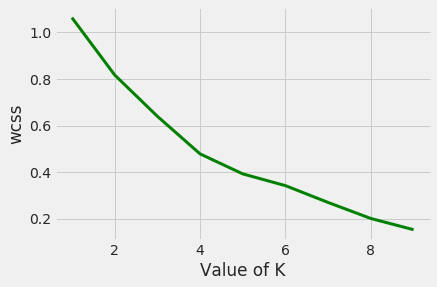

In [235]:
# Set dataframe for clustering, we only need the categories from our one hot encoded dataframe grouped by neighborhood
pankow_grouped_clustering = pankow_grouped.drop('Neighborhood', 1)

# Create empty array for within cluster sum of squares
wcss = [] 
for i in range(1, 10): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(pankow_grouped_clustering) 
      
    # Calculate within cluster sum of squares using function KM.inertia_ 
    wcss.append(KM.inertia_)      

# Plot the cost against K values 

style.use("fivethirtyeight")
plt.plot(range(1, 10), wcss, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("wcss") 
plt.show()

K-means clustering depends a lot on the initialization of centroids. Since this is set by us and can differ each time, k-means clustering leads to a different result each time we run it (local optimum rather than a global optimum). Here we use the "k-means++" initialization and set the number of times the k-means algorithm will be run with different centroids (n_init) as 12. Scikit learn's "k-means++" initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization (e.g., random_state). Check out this paper for more information (http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf).

In [236]:
# Set number of clusters
k = 4

# Run k-means clustering using initialization "k-means++" and number of times k-means will be run with different centroids (n_init) as 12
kmeans = KMeans(init = "k-means++", n_clusters = k, n_init = 12).fit(pankow_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 3, 2, 2], dtype=int32)

In [237]:
# Add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

pankow_merged = pankow

# merge manhattan_grouped with manhattan to add latitude/longitude for each neighborhood
pankow_merged = pankow_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

pankow_merged

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Prenzlauer Berg,Pankow,52.539847,13.428565,2,Café,Vietnamese Restaurant,Bar,Gourmet Shop,Italian Restaurant,Ice Cream Shop,Coffee Shop,Cocktail Bar,Middle Eastern Restaurant,Breakfast Spot
1,Weißensee,Pankow,52.554619,13.463002,2,Supermarket,Bakery,Tram Station,German Restaurant,Bistro,Ice Cream Shop,Park,Burger Joint,Bus Stop,Indian Restaurant
2,Blankenburg,Pankow,52.593211,13.454182,2,Greek Restaurant,Gas Station,Light Rail Station,Café,Supermarket,Bakery,Bus Stop,Wine Bar,Dumpling Restaurant,Dessert Shop
3,Heinersdorf,Pankow,52.572825,13.437015,2,Supermarket,Tram Station,Train Station,Discount Store,Fried Chicken Joint,Light Rail Station,Gym / Fitness Center,Bus Stop,Fish Market,Fast Food Restaurant
4,Karow,Pankow,52.615087,13.486276,0,Supermarket,Plaza,BBQ Joint,Restaurant,Park,Bus Stop,Bakery,Insurance Office,Drugstore,Café
5,Stadtrandsiedlung Malchow,Pankow,52.571019,13.463285,3,Music Venue,Athletics & Sports,Automotive Shop,Supermarket,Indoor Play Area,Empanada Restaurant,Coffee Shop,Dance Studio,Dessert Shop,Dim Sum Restaurant
6,Pankow,Pankow,52.597637,13.436374,2,Tram Station,Supermarket,Light Rail Station,Asian Restaurant,Lake,Bus Stop,Bakery,Wine Bar,Dumpling Restaurant,Dessert Shop
7,Blankenfelde,Pankow,52.618627,13.388447,1,Stables,Clothing Store,Café,Trail,Auto Garage,Empanada Restaurant,Coffee Shop,Dance Studio,Dessert Shop,Dim Sum Restaurant
8,Buch,Pankow,52.636672,13.499929,2,Big Box Store,Art Gallery,Light Rail Station,Bus Stop,Supermarket,Bakery,Pharmacy,Italian Restaurant,Drugstore,Dumpling Restaurant
9,Französisch Buchholz,Pankow,52.610513,13.428110,0,Supermarket,Tram Station,Organic Grocery,Drugstore,Flower Shop,Plaza,Cocktail Bar,Coffee Shop,Dance Studio,Dessert Shop


### Map Pankow Venue Clusters

In [238]:
# Create map of clusters
map_clusters = folium.Map(location=[lat, long], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, long, poi, cluster in zip(pankow_merged['Latitude'], pankow_merged['Longitude'], pankow_merged['Neighborhood'], pankow_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster 1

Cluster 1 covers a wide geographic range from north to south and is more residential, focusing on cafes and restaurants, markets, drugstores, bakeries, and bars. We also know from taking the venue count by neighborhood above that Prenzlauer Berg includes nearly half of all the venues in the borough Pankow.

In [336]:
# Isolate cluster and include neighborhood column and column 5 onwards
pankow_merged.loc[pankow_merged['Cluster Labels'] == 0, pankow_merged.columns[[0] + list(range(5, pankow_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Prenzlauer Berg,Café,Ice Cream Shop,Vietnamese Restaurant,Bar,Middle Eastern Restaurant,Cocktail Bar,Trattoria/Osteria,Beer Bar,Breakfast Spot,Gourmet Shop
1,Weißensee,Supermarket,Tram Station,Bakery,German Restaurant,Plaza,Hotel,Italian Restaurant,Optical Shop,Bus Stop,Diner
2,Blankenburg,Greek Restaurant,Gas Station,Café,Bus Stop,Supermarket,Bakery,Light Rail Station,Wine Bar,Dumpling Restaurant,Dessert Shop
8,Buch,Supermarket,Bus Stop,Big Box Store,Pharmacy,Pet Store,Bakery,Drugstore,Italian Restaurant,Light Rail Station,Asian Restaurant
10,Niederschönhausen,Supermarket,Tram Station,Greek Restaurant,Café,Italian Restaurant,Recreation Center,Paintball Field,Palace,Park,Hobby Shop
12,Wilhelmsruh,Bakery,Music Venue,Athletics & Sports,Restaurant,Bus Stop,Supermarket,Asian Restaurant,Mexican Restaurant,Clothing Store,Post Office


#### Cluster 2

Cluster 2 includes northern, less residential neighborhoods, focusing on public transport, discount markets, low cost eateries, and fitness / dance studios.

In [338]:
# Isolate cluster and include neighborhood column and column 5 onwards
pankow_merged.loc[pankow_merged['Cluster Labels'] == 1, pankow_merged.columns[[0] + list(range(5, pankow_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Heinersdorf,Supermarket,Tram Station,Train Station,Discount Store,Bus Stop,Fried Chicken Joint,IT Services,Fish Market,Fast Food Restaurant,Light Rail Station
4,Karow,Supermarket,Plaza,German Restaurant,Drugstore,Café,Bus Stop,Park,BBQ Joint,Bakery,Lake
6,Pankow,Tram Station,Supermarket,Asian Restaurant,Bus Stop,Light Rail Station,Bakery,Lake,Wine Bar,Dumpling Restaurant,Dessert Shop
9,Französisch Buchholz,Supermarket,Tram Station,ATM,Plaza,Drugstore,Organic Grocery,Garden Center,Gay Bar,Clothing Store,Cocktail Bar
11,Rosenthal,Supermarket,Tram Station,Garden Center,Bus Stop,German Restaurant,Bowling Alley,Athletics & Sports,Automotive Shop,Donut Shop,Dive Bar


#### Cluster 3

Cluster 3 includes just one neighborhood, Stadtrandsiedlung Malchow, and is less residential, focusing on an music venue, athletic / play facilities, auto shop, supermarket, and small shops. 

In [339]:
# Isolate cluster and include neighbordhood column and column 5 onwards
pankow_merged.loc[pankow_merged['Cluster Labels'] == 2, pankow_merged.columns[[0] + list(range(5, pankow_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Stadtrandsiedlung Malchow,Music Venue,Athletics & Sports,Automotive Shop,Supermarket,Indoor Play Area,Wine Bar,Empanada Restaurant,Dance Studio,Dessert Shop,Dim Sum Restaurant


#### Cluster 4

Cluster 4 includes just one neighborhood, Blankenfelde, and focuses on a cafe, shop, garage, and casual bars and restaurants.

In [340]:
# Isolate cluster and include neighborhood column and column 5 onwards
pankow_merged.loc[pankow_merged['Cluster Labels'] == 3, pankow_merged.columns[[0] + list(range(5, pankow_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Blankenfelde,Café,Miscellaneous Shop,Auto Garage,Wine Bar,Empanada Restaurant,Dance Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store


## 9. Summary Results and Recommendations

Berlin's Airbnb market and venue types vary widely by borough and neighborhood. One potentially strong entry point would be the Prenzlauer Berg neighborhood of the borough Pankow or the Prenzlauer Berg Sud or Helmholzplatz neighborhoods of the borough Mitte, which command above-median occupancy and revenue per month. In terms piggybacking and partnering with local businesses, Prenzlauer Berg contains roughly 40 percent of all venues in the borough Pankow on Foursquare. Clustering Pankow's venues, we also see that Prenzlauer Berg is both trendy and family/group-friendly with cafes, markets / shops, bars, restaurants, and galleries. Beyond its venue makeup, it has family and group-friendly demographics. Underscoring overall business potential is the fact that superhost status garners a more than 2x premium on price and occupancy. Additionally, focusing on units that accomodate 3 or more pays dividends. A unit can command above-median occupancy if it can accommadate 3 or more people, including families or groups of business travelers/students, and above-median revenue per month if it can accommodate either 1 person or above 8 people. One downside to this approach is that Prenzlauer Berg, as well as similarly strong Airbnb neighborhoods in Mitte, Charlottenberg-Wilmerrsdorf, and Friedrichshain-Kreuzberg are saturated. An alternative strategy, depending on business objectives, that can be explored further is to enter less saturated, lower occupancy, higher potential growth markets in Friedrichshain-Kreuzberg, Neukolln, and Wedding. 

## 10. Future Areas for Analysis

Future areas for analysis include other important Airbnb listing variables, additional feature engineering, time series analysis on trends by neighborhood, NLP analysis on reviews and descriptions, and more accurate predictive modeling. Enriching our data with more information on demographics, public and private development investments by neighborhood, and consumer / hospitality data would be important in solidifying a phased entry strategy. 